In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 16
from scipy import fftpack
from scipy.ndimage import gaussian_filter
from scipy import signal
import scipy
import warnings
warnings.filterwarnings('ignore')

In [3]:
dfo1hrun1 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run1.txt', delimiter=' ' , dtype= np.float64)
dfo1hrun2 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run2.txt', delimiter=' ' , dtype= np.float64)
dfo1hrun3 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run3.txt', delimiter=' ' , dtype= np.float64)
dfo1hrun4 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run4.txt', delimiter=' ' , dtype= np.float64)

In [4]:
dfO1h = pd.concat([dfo1hrun1['Delays'], dfo1hrun1['Time-delay1'], dfo1hrun2['Time-delay2'], dfo1hrun3['Time-delay3'], 
                  dfo1hrun4['Time-delay4']], axis=1)
dfO1h = dfO1h.rename(columns={"Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3", 
                            "Time-delay4": "Run4"}, errors="raise")

dfO1h['mean'] = dfO1h.iloc[:, 1:].mean(axis=1)
dfO1h['std'] = dfO1h.iloc[:, 1:].std(axis=1)

In [5]:
dfo1run1 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run1.txt', delimiter=' ' , dtype= np.float64)
dfo1run2 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run2.txt', delimiter=' ' , dtype= np.float64)
dfo1run3 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run3.txt', delimiter=' ' , dtype= np.float64)
dfo1run4 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run4.txt', delimiter=' ' , dtype= np.float64)
dfo1run5 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run5.txt', delimiter=' ' , dtype= np.float64)
dfo1run6 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run6.txt', delimiter=' ' , dtype= np.float64)
dfo1run7 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run7.txt', delimiter=' ' , dtype= np.float64)

In [6]:
dfO1 = pd.concat([dfo1run1['Delays'], dfo1run1['Time-delay1'], dfo1run2['Time-delay2'], dfo1run3['Time-delay3'], 
                  dfo1run4['Time-delay4']], axis=1)
dfO1 = dfO1.rename(columns={"Delays": "Delays_Full", "Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3", 
                            "Time-delay4": "Run4"}, errors="raise")
dfO1 = pd.concat([dfO1, dfo1run5['Time-delay1'], dfo1run6['Time-delay2'], dfo1run7['Time-delay3']], axis=1)
dfO1 = dfO1.rename(columns={"Time-delay1": "Run5", "Time-delay2": "Run6", "Time-delay3": "Run7"}, 
                   errors="raise")

In [7]:
dfO1['mean'] = dfO1.iloc[:, 3:].mean(axis=1)
dfO1['std'] = dfO1.iloc[:, 3:].std(axis=1)

In [25]:
labels = ['Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5']

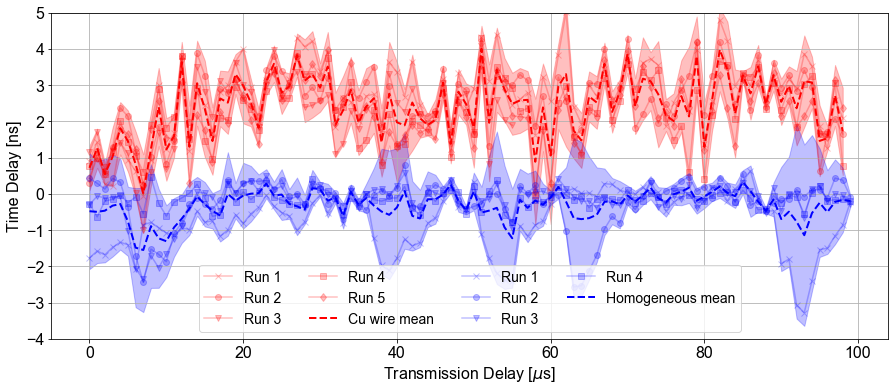

In [29]:
plt.figure(figsize=(15,6))
[plt.plot(dfO1['Delays_Full'], dfO1[r], p, label = l, alpha = 0.25, color = 'r') for r, p, l in zip(dfO1.keys()[3:8], ['-x', '-o', '-v', '-s', '-d', '-*'], labels)]
plt.plot(dfO1['Delays_Full'], dfO1['mean'], '--', color = 'r', label = 'Cu wire mean', linewidth = 2)
plt.fill_between(dfO1.index, dfO1['mean'] - 2*dfO1['std'], dfO1['mean'] + 2*dfO1['std'],
                alpha=.25, color = 'r')

[plt.plot(dfO1h['Delays'], dfO1h[r], p, label = l, alpha = 0.25, color = 'b') for r, p, l in zip(dfO1h.keys()[1:5], ['-x', '-o', '-v', '-s', '-d', '-*'], labels)]
plt.plot(dfO1h['Delays'], dfO1h['mean'], '--', color = 'b', label = 'Homogeneous mean', linewidth = 2)
plt.fill_between(dfO1h.index, dfO1h['mean'] - 2*dfO1h['std'], dfO1h['mean'] + 2*dfO1h['std'],
                alpha=.25, color = 'b')

plt.grid()
plt.xlabel('Transmission Delay [$\mu$s]')
plt.ylabel('Time Delay [ns]')
frame1 = plt.gca()
# frame1.axes.xaxis.set_ticklabels([])
plt.ylim(-4, 5)
plt.legend(fontsize=14, ncol = 4)
# plt.title('Orientation One')
# plt.savefig('c:/users/Jacob/Nonlinearity/Images/Final_results/Cu-wiresvsHomocementO1.png', dpi=600, bbox_inches='tight',
#            format='png')
plt.show()